# Task 2: To Explore Supervised Machine Learning


### In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.¶

In [1]:
#importing all libraries required for this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape


(25, 2)

In [4]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

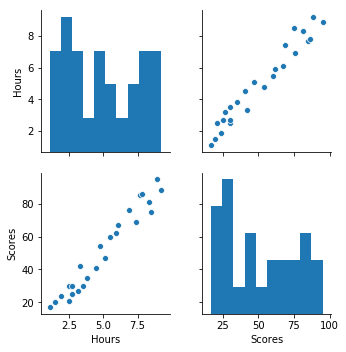

In [6]:
#plotting the pairplot 
sns.pairplot(data)

In [8]:
data_corr = data.corr()

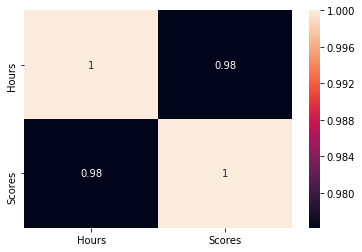

In [9]:
sns.heatmap(data_corr,annot=True)


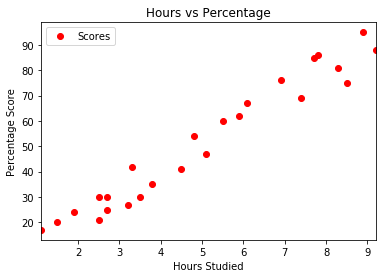

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', c='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values


# Test -Train and splitting of Data

In [13]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training

In [14]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print("Complete Training")

Complete Training


In [15]:
print(lin_reg.intercept_)

2.018160041434662


In [16]:
print(lin_reg.coef_)

[9.91065648]


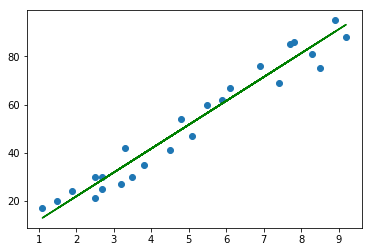

In [17]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

plt.scatter(X, y)
plt.plot(X, line,c='green');
plt.show()

# Predicting scores based on test hours¶


In [18]:
y_predict = lin_reg.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Text(0, 0.5, 'Precentage Score ')

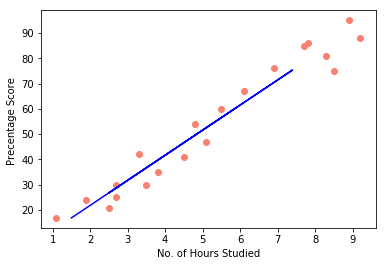

In [19]:
plt.scatter(X_train,y_train,color="salmon")
plt.plot(X_test,y_predict,color="blue")
plt.xlabel("No. of Hours Studied")
plt.ylabel("Precentage Score ")

# Comparing Actual vs Predicted Values¶


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting score when studying hours are 9.25¶


In [21]:
hours = 9.25
pred = lin_reg.predict([[hours]])
print("No. of Hours =",hours)
print("Predicted Score =",pred[0])

No. of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluating Model¶


In [22]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373
